In [38]:
import pandas as pd
import matplotlib
import seaborn
import sklearn
import numpy
%matplotlib inline

In [39]:
from sklearn.decomposition import PCA

In [40]:
df = pd.read_table("Data_all_2016_metadata.txt", index_col=0)

In [74]:
value_columns = list(df.columns)

In [75]:
value_columns.remove('Season')
value_columns.remove('Salinity_cat')
value_columns.remove('Depth_cat')
value_columns.remove('Oxy_cat')
value_columns.remove('Chla_Picoeuk.')
value_columns.remove('PO4')
value_columns.remove('SiO2')
value_columns.remove('NO2')
value_columns.remove('NO3')
value_columns.remove('NH4')
value_columns.remove('Synechococcus')
value_columns.remove('O2')
value_columns.remove('Tbact')

In [76]:
value_columns

['salinity', 'Depth', 'Temperature', 'Latitude', 'Longitude']

In [91]:
kept_columns = list(df.columns)
kept_columns.remove('Season')
kept_columns.remove('Salinity_cat')
kept_columns.remove('Depth_cat')
kept_columns.remove('Oxy_cat')
kept_columns.remove('Chla_Picoeuk.')
kept_columns.remove('NH4')

In [98]:
kept_columns

['salinity',
 'Depth',
 'Temperature',
 'O2',
 'PO4',
 'SiO2',
 'NO2',
 'NO3',
 'Tbact',
 'Synechococcus',
 'Latitude',
 'Longitude']

In [99]:
null_ixs = pd.isnull(df[kept_columns]).any(1).nonzero()[0]

In [105]:
null_samples = df.index[null_ixs]

In [107]:
df['sample_name'] = df.index

In [109]:
def assign_null_sample(x):
    if x in null_samples:
        return True
    return False

In [111]:
df['null_sample'] = df['sample_name'].apply(assign_null_sample)

In [78]:
pca = PCA(n_components=2)
pca.fit(df[value_columns].values.astype(float))

PCA(copy=True, n_components=2, whiten=False)

In [81]:
pca_data = pca.fit_transform(df[value_columns].values.astype(float))

In [114]:
pca_data_df = pd.DataFrame(pca_data, index=df.index)
pca_data_df['null_sample'] = df['null_sample']

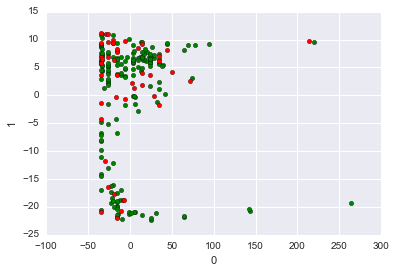

In [120]:
c_d = {True: "red",
False: "green"}

for i, groupby_tuple in enumerate(pca_data_df.groupby('null_sample')):
    null_val, null_df = groupby_tuple
    if i:
        null_df.plot.scatter(x=0,y=1, color=c_d[null_val], ax=ax)
    else:
        ax = null_df.plot.scatter(x=0,y=1, color=c_d[null_val])

In [26]:
df[value_columns]

,salinity,Depth,Temperature,O2,PO4,SiO2,NO2,NO3,NH4,Tbact,Synechococcus,Latitude,Longitude
Lib,,,,,,,,,,,,,
S1,10.5063,10.0,16.5551,6.64000,0.06,9.00,0.01,0.08,NaN,1080000,1.133175e+08,54.400000,12.100000
S10,9.3619,60.0,5.1197,6.60000,NaN,NaN,NaN,NaN,NaN,5268907.563,2.393091e+06,55.300000,16.000000
S101,6.5331,20.0,7.2228,7.09000,0.15,7.60,0.01,0.02,NaN,2810000,4.310644e+07,58.151500,17.736500
S104,6.2286,17.0,6.7952,7.26592,NaN,NaN,NaN,NaN,NaN,2720000,3.304108e+07,57.699833,17.353500
S106,7.4905,55.0,3.7853,6.95000,0.97,15.60,0.25,4.17,NaN,919000,2.526611e+06,57.699833,17.353500
S107,5.9172,10.0,14.6283,7.75000,0.05,6.30,0.02,0.03,0.250,5030000,1.087162e+08,57.699833,17.353500
S109,7.1521,40.0,3.8798,7.70000,0.61,11.40,0.25,1.79,0.860,651000,2.393091e+06,57.699833,17.353500
S111,5.6106,10.0,15.0038,7.77000,0.00,4.90,0.01,0.00,NaN,5110000,1.262484e+08,56.760000,17.353833
S112,6.0345,20.0,12.3533,6.36000,0.11,6.20,0.01,0.00,NaN,3730000,4.510924e+07,56.760000,17.353833
